Student's Name and Email Address

Boise State University, Department of Chemistry and Biochemistry

## CHEM 324: PChem Lab {-}
# Worksheet 3: Transient Absorption Spectroscopy {-}

In [149]:
# @title Notebook Setup { display-mode: "form" }
# Import the main modules used in this worksheet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.linear_model import LinearRegression


# The following needs to be the path of the folder with all your datafile in .csv format
base_path = '/Users/School/PycharmProjects/PChemLab/ModelingData/'

In [150]:
# @title Set Local Path { display-mode: "form" }
# The following needs to be the path of the folder with all your collected data in .csv format
# @param {type:"string"}
path = "/Users/School/PycharmProjects/PChemLab/TA_Data/Transient_Absorption/"

In [151]:
# @title Functions to load the data { display-mode: "form" }
def load_data_to_file_dict(file_dict):
    """
    Load a Transient Absorption Spectroscopy .csv file. 
    The format of the file should have one row of header, semicolon as separator, and colon as decimal separator

    Input variables:
        file_dict : a dictionary with 'path' and 'name' keys corresponding to the file to be loaded
    
    Action: 
        Add to file_dict a Pandas DataFrame with multiple columns: Laser Delay (in nanoseconds)
        and one column for each TA run in units of mOD
    """
    data = pd.read_csv(file_dict['path']+file_dict['name'],sep=';',decimal='.')
    file_dict['data'] = data
    return

def plot_file_dict(file_dict, yaxis = 'all'):
    """ 
    Given a file dictionary, plot one of the transient absorption curves (or the average)
    versus the laser delay
    """
    if not ('data' in file_dict): 
        load_data_to_file_dict(file_dict)
    if yaxis == 'all':
        for column in file_dict['data'].columns:
            if column == 'Laser Delay [ns]' : continue
            plt.plot(file_dict['data']['Laser Delay [ns]'],file_dict['data'][column],label=column)
    else : 
        if yaxis in file_dict['data'].columns:
            plt.plot(file_dict['data']['Laser Delay [ns]'],file_dict['data'][yaxis],label=yaxis)
        else:
            print('ERROR: specified yaxis is not in the read data')
    plt.ylabel('Transient Absorption [mOD]')
    plt.xlabel('Laser Delay [ns]')
    plt.legend()
    plt.show()

def plot_file_list(file_list,yaxis = 'TA1 [mOD]'):
    """
    Given a list of dictionary files, plot one of the transient absorption curves (or the average)
    versus the laser delay for each of the files
    """
    #
    fig, ax = plt.subplots()
    #
    for file_dict in file_list : 
        (file_dict)
        plt.plot(file_dict['data']['Laser Delay [ns]'],file_dict['data'][yaxis],label=file_dict['label'])
    plt.ylabel('Transient Absorption [mOD]')
    plt.xlabel('Laser Delay [ns]')
    plt.legend()
    plt.show()

In [152]:
# @title Utilities to analyze the data { display-mode: "form" }
def exponential(t, a, tau, o):
    """ 
    Function that returns an exponentially decaying function plus offset
    f(t) = o + a*e^(-t/tau)

    input variables
    t: input value (units of time)
    a: amplitude (units of absorbance or concentration)
    tau: lifetime (units of time)
    o: offset (units of absorbance or concentration)
    """
    if tau < 1.e-10 : 
        print('ERROR: choose a value of tau greater than zero')
        return 0.
    return a * np.exp(-t/tau) + o

def fit_ta_data(file_dict, yaxis = 'TA1 [mOD]', verbose = False, semilog = False):
    """ 
    Perform the fit of transient absorption decay curves using an exponential 
    functions plus offset. 

    Input parameters: 
    file_dict: a dictionary with information on the file with the data (path and name) and
               adjustable parameters related to the fit:
               time_skip : initial transient regime to remove from the fit
               C0_guess, k_guess, offset_guess: starting guess of fitting parameters
    yaxis : the column of the dataframe to use for the fit
    verbose : if True plot the filtered data and the corresponding fit
    semilog : if True, plot in semilogy scale

    Action: 
           Filter the data by removing the initial time_skip part of the curve
           Fit according to an exponential decay
           Save the optimized values of the parameters and their standard errors in file_dict
           Save the fitted curve in the file_dict['data'] DataFrame
    """   
    if not ('data' in file_dict): 
        load_data_to_file_dict(file_dict)
    xaxis = 'Laser Delay [ns]'
        
    # Instead of filtering with only 'time_skip', use 'LD_TAmax' for proper fitting
    file_dict['filtered_data'] = file_dict['data'][file_dict['data']['Laser Delay [ns]'] >= file_dict['LD_TAmax']].copy()
    x = file_dict['filtered_data'][xaxis]
    y = file_dict['filtered_data'][yaxis]

    funct = exponential
    p0 = (file_dict['DA0_guess'],file_dict['tau_guess'],file_dict['offset_guess'])
    params, cv = scipy.optimize.curve_fit(funct,x,y,p0)

    file_dict['DA0'] = params[0]
    file_dict['DA0_SE'] = np.sqrt(cv[0,0])
    file_dict['tau'] = params[1]
    file_dict['tau_SE'] = np.sqrt(cv[1,1])
    file_dict['offset'] = params[2] 
    file_dict['offset_SE'] = np.sqrt(cv[2,2])

    file_dict['data']['TA_fitted'] = funct(file_dict['data']['Laser Delay [ns]'], params[0], params[1], params[2])

    if verbose :
        if semilog :
            plt.semilogy(x,y,label=yaxis)
            plt.semilogy(x,funct(x,params[0],params[1],params[2]),label='Fit')
        else :
            plt.plot(x,y,label=yaxis)
            plt.plot(x,funct(x,params[0],params[1],params[2]),label='Fit')
        plt.ylabel('Transient Absorption [mOD]')
        plt.xlabel('Laser Delay [ns]')
        plt.legend()
        plt.show()

The functions below are incomplete and will need to be completed by the student.

In [153]:
def calc_average_TA(file_dict):
    """
    Average all the TA runs recorded in a TA .csv file.

    Input variables:
        file_dict : a dictionary with 'path' and 'name' keys corresponding to the file to be loaded
    
    Action: 
        Create a new column in the file_dict['data'] component of the input with the average
        of the TA runs recorded in the file
    """
    if not ('data' in file_dict): 
        load_data_to_file_dict(file_dict)
    columns = file_dict['data'].columns.drop('Laser Delay [ns]')
    if 'TAaverage' in file_dict['data'].columns: 
        columns = columns.drop('TAaverage')
    # the variable columns is a list that contains the columns of the dataframe you need to average
    file_dict['data']['TAaverage'] = file_dict['data'][columns].mean(axis=1)
    return

def calc_max_TA(file_dict):
    """
    Given a file dictionary with the average TA, find the maximum value of the transient absorption 
    and the Laser Delay at which this value occurs

    Input variables:
        file_dict : a dictionary with 'path' and 'name' keys corresponding to the file to be loaded
    
    Action: 
        
    """
    if not ('data' in file_dict): 
        load_data_to_file_dict(file_dict)
    if not ('TAaverage' in file_dict['data'].columns): 
        calc_average_TA(file_dict)


    max_index = file_dict['data']['TAaverage'].idxmax()


    file_dict['TAmax'] = file_dict['data']['TAaverage'].iloc[max_index]
    file_dict['LD_TAmax'] = file_dict['data']['Laser Delay [ns]'].iloc[max_index]
    return

## Task 1: Average of TA Spectra {-}

* Visualize the chemical structures of ZnTPP (CAS 14074-80-7) and comment on why this molecule is absorbing in the visible.
* Load the TA spectra for the first concentration of ZnTPP into a Pandas DataFrame. Average the scans and save them as an extra column in the DataFrame. 
* Plot the different TA spectra for the first concentration of ZnTPP together with the averaged spectra. You will need to present one figure containing all scans and the averaged one. 

In [154]:
file1 = {'path':path, 'name':'BZ02_traces_JGD.csv', 'label':'Run1', '[ZnTPP]': 0.2, '[C70]':0., 'time_skip':0, 'DA0_guess':1., 'tau_guess':1., 'offset_guess':0.}

load_data_to_file_dict(file1)

# Calculate the average of all runs and save as 'TAaverage'
calc_average_TA(file1)

# Display the first few rows of the DataFrame to confirm the 'TAaverage' column exists
print(file1['data'].head())

file1['data'].info()

   Laser Delay [ns]  TA1 [mOD]  TA2 [mOD]  TA3 [mOD]  TA4 [mOD]  TA5 [mOD]  \
0              -400  -0.156040   0.052836  -0.042546  -0.020014  -0.043532   
1              -390   0.020170  -0.073852  -0.094779  -0.012826  -0.031241   
2              -380  -0.095081  -0.105654  -0.138320  -0.186732  -0.228423   
3              -370   0.054264  -0.112342   0.096853  -0.055917  -0.079905   
4              -360  -0.186523  -0.068750  -0.141978  -0.270366  -0.004610   

   TAaverage  
0  -0.041859  
1  -0.038506  
2  -0.150842  
3  -0.019409  
4  -0.134445  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Laser Delay [ns]  541 non-null    int64  
 1   TA1 [mOD]         541 non-null    float64
 2   TA2 [mOD]         541 non-null    float64
 3   TA3 [mOD]         541 non-null    float64
 4   TA4 [mOD]         541 non-null    float64
 5   TA5

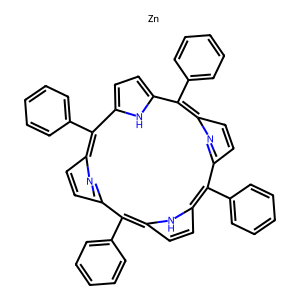

In [155]:
# @title Choose the molecule to draw { display-mode: "form" }
from rdkit import Chem
from rdkit.Chem import Draw
import cirpy

# Define input and input type
input_molecule = '5,10,15,20-Tetraphenyl-21H,23H-porphine zinc'
input_type = 'name'

# Fetch the SMILES string using CIRpy
if input_type != 'smiles':
    smiles = cirpy.resolve(input_molecule, 'smiles')
else:
    smiles = input_molecule

if smiles:
    molecule = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(molecule, size=(300, 300))
    display(img)
else:
    print("Unable to retrieve the structure for the given input.")

ZnTPP is a metalloporphyrin complex with zinc (Zn 2+) is coordinated to four nitrogens of the extensively conjugated tetraphenylporphyrin ligand. Porphyrin's extensive π-system lowers the HOMO-LUMO gap to absorb within the visible region.This is something we see often with conjugated polymers and dyes. Demonstrated Soret band (400-450nm) is characteristic of porphyrin compounds. Q-bands also present but weaker and absorbing around 500-700 nm.

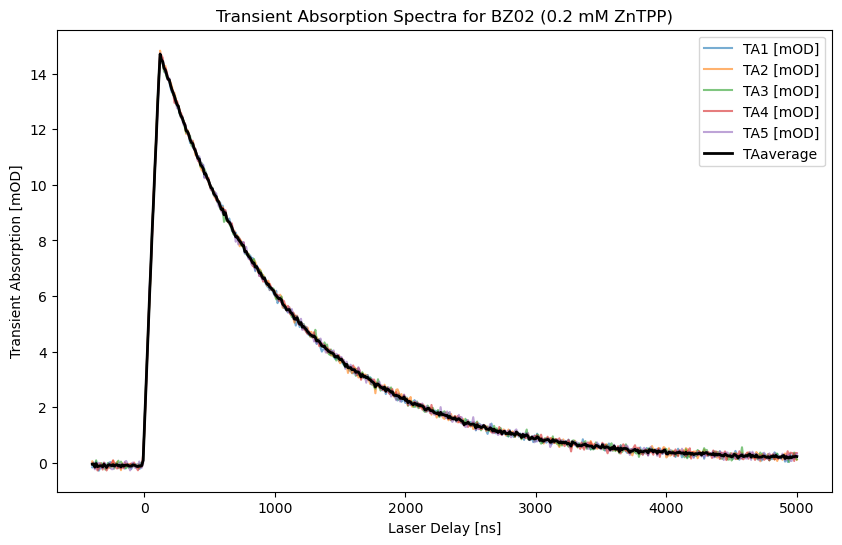

In [156]:
# @title Plot All Scans and Averaged Spectrum { display-mode: "form" }
import matplotlib.pyplot as plt

# Plot all individual scans
plt.figure(figsize=(10, 6))
for column in file1['data'].columns:
    if column not in ['Laser Delay [ns]', 'TAaverage']:
        plt.plot(file1['data']['Laser Delay [ns]'], file1['data'][column], label=column, alpha=0.6)

# Plot the averaged spectrum in bold
plt.plot(file1['data']['Laser Delay [ns]'], file1['data']['TAaverage'], label='TAaverage', color='black', linewidth=2)

# Plot styling
plt.title('Transient Absorption Spectra for BZ02 (0.2 mM ZnTPP)')
plt.xlabel('Laser Delay [ns]')
plt.ylabel('Transient Absorption [mOD]')
plt.legend()
plt.show()

## Task 2: TA Spectra for Varying ZnTPP Concentrations {-}

* Load and average the TA spectra for the different ZnTPP concentrations. Explicitly report all the constants and/or known experimental values that you will need in your following analyses. 

In [157]:
# Define all ZnTPP-only files (No C70 present)
file1 = {'path': path, 'name': 'BZ08_JDG.csv', 'label': 'BZ08 (0.8 mM ZnTPP)', '[ZnTPP]': 0.8, '[C70]': 0.0, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}
file2 = {'path': path, 'name': 'BZ04_JGD.csv', 'label': 'BZ04 (0.4 mM ZnTPP)', '[ZnTPP]': 0.4, '[C70]': 0.0, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}
file3 = {'path': path, 'name': 'BZ02_JGD.csv', 'label': 'BZ02 (0.2 mM ZnTPP)', '[ZnTPP]': 0.2, '[C70]': 0.0, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}

# Group the files into a list for processing
experiment1 = [file1, file2, file3]

# Load and average each file in the list
for file in experiment1:
    load_data_to_file_dict(file)
    calc_average_TA(file)

# Display confirmation message
print("Data loaded and averaged successfully for all ZnTPP concentrations.")


Data loaded and averaged successfully for all ZnTPP concentrations.


In [158]:
# @title Report Constants and Known Values { display-mode: "form" }
print("Constants and Known Experimental Values:")
print("=======================================")
print("1. Sample Concentrations (ZnTPP Only - No C70):")
print("   - BZ02 (0.2 mM ZnTPP): 1 mL of 0.8 mM ZnTPP + 3 mL of Benzonitrile (Solvent)")
print("   - BZ04 (0.4 mM ZnTPP): 2 mL of 0.8 mM ZnTPP + 2 mL of Benzonitrile (Solvent)")
print("   - BZ08 (0.8 mM ZnTPP): 4 mL of 0.8 mM ZnTPP (No solvent added)")
print()
print("2. Laser Settings:")
print("   - Pump Laser: 520 ± 10 nm, Pulse Length: 6 to 129 ns, Max Energy: 186 nJ")
print("   - Probe Laser: 450 ± 10 nm, Pulse Length: 5 to 39 ns, Max Energy: 3 nJ")
print()
print("3. Solvent: Benzonitrile (Non-reactive with ZnTPP or C70)")
print()
print("4. Initial Guess Values for Curve Fitting:")
print("   - DA0_guess = 1.0  (Initial Amplitude)")
print("   - tau_guess = 10.0  (Initial Lifetime in ns)")
print("   - offset_guess = 0.0  (Initial Offset)")
print()
print("5. Measurement Parameters:")
print("   - Start Delay: -400 ns")
print("   - End Delay: 5000 ns")
print("   - Number of Average Cycles: 5")
print()
print("6. Expected Behavior: Pure ZnTPP decay without C70 (Baseline Measurement)")

Constants and Known Experimental Values:
1. Sample Concentrations (ZnTPP Only - No C70):
   - BZ02 (0.2 mM ZnTPP): 1 mL of 0.8 mM ZnTPP + 3 mL of Benzonitrile (Solvent)
   - BZ04 (0.4 mM ZnTPP): 2 mL of 0.8 mM ZnTPP + 2 mL of Benzonitrile (Solvent)
   - BZ08 (0.8 mM ZnTPP): 4 mL of 0.8 mM ZnTPP (No solvent added)

2. Laser Settings:
   - Pump Laser: 520 ± 10 nm, Pulse Length: 6 to 129 ns, Max Energy: 186 nJ
   - Probe Laser: 450 ± 10 nm, Pulse Length: 5 to 39 ns, Max Energy: 3 nJ

3. Solvent: Benzonitrile (Non-reactive with ZnTPP or C70)

4. Initial Guess Values for Curve Fitting:
   - DA0_guess = 1.0  (Initial Amplitude)
   - tau_guess = 10.0  (Initial Lifetime in ns)
   - offset_guess = 0.0  (Initial Offset)

5. Measurement Parameters:
   - Start Delay: -400 ns
   - End Delay: 5000 ns
   - Number of Average Cycles: 5

6. Expected Behavior: Pure ZnTPP decay without C70 (Baseline Measurement)


* Plot the averaged TA spectra for the different ZnTPP concentrations. 

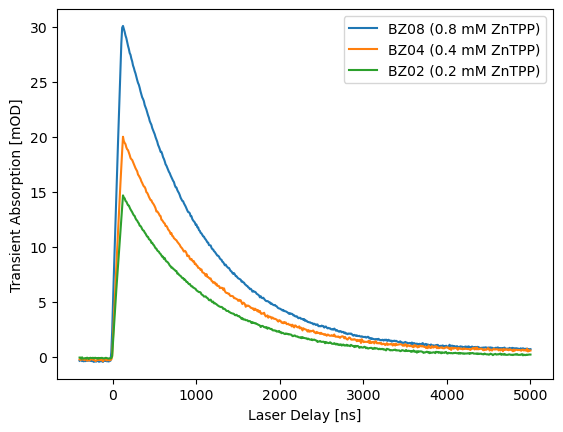

In [159]:
# Plot all averaged spectra using plot_file_list function
plot_file_list(experiment1, yaxis='TAaverage')

* What effects on the signal do you observe for different concentrations?
* How can those effects be explained by setup parameters and/or reaction chemistry?

The signal increases significantly as the concentration of ZnTPP increases from 0.2 mM (BZ02) to 0.8 mM (BZ08). Higher concentration of ZnTPP molecules results in more molecules being excited by the laser consonant with a proportionally stronger TA signal. The decay of the signal follows a singular exponential trend, indicative of triplet state relaxation. The lifetime (tau) should be independent of concentration if the decay is a first-order relaxation process. So higher conc. = increased signal; noise is relatively small; overall, curves look good.

The increased signal can be explained by the increase of ZnTPP molecules to be excited; this is concentration dependent governed by Beer's Law where A (absorbance) is proportional to concentration (C) multiplied by path length (l). The decay remains first-order and independent of concentration and relaxes via non-radiative mechanisms. Averaging multiple scans serves to improve signal-to-noise ratio; ultimately, changes in concentration only affect the magnitude of signal, not the decay.


## Task 3: Max Signal and Time Constants for Varying ZnTPP Concentrations {-}

* For each averaged TA spectra, compute the maximum transient absorption and the delay at which it occurs.

In [160]:
for file in experiment1:
    calc_max_TA(file)
# Display the results
for file in experiment1:
    print(f"{file['label']}: Maximum TA = {file['TAmax']:.2f} mOD at {file['LD_TAmax']:.2f} ns")

BZ08 (0.8 mM ZnTPP): Maximum TA = 30.09 mOD at 120.00 ns
BZ04 (0.4 mM ZnTPP): Maximum TA = 20.02 mOD at 120.00 ns
BZ02 (0.2 mM ZnTPP): Maximum TA = 14.70 mOD at 120.00 ns


* Fit the portion of the averaged TA spectra after the peak with an exponential curve with a vertical offset.

In [161]:
# The following loop will compute the maximum of each averaged TA spectrum and fit the decay portion
# NOTE: Make sure calc_max_TA() has been applied to find 'LD_TAmax'

for file in experiment1:
    try:
        fit_ta_data(file, yaxis='TAaverage')

        # If the fit is successful, print the results
        print(f"✅ Fit successful for {file['label']}:")
        print(f"  Amplitude (DA0): {file['DA0']:.2f} ± {file['DA0_SE']:.2f}")
        print(f"  Lifetime (tau): {file['tau']:.2f} ± {file['tau_SE']:.2f} ns")
        print(f"  Offset: {file['offset']:.2f} ± {file['offset_SE']:.2f}")
        print("---------------------------------------------------")

    except Exception as e:
        # If an error occurs during fitting, print the error message
        print(f"❌ Fit failed for {file['label']}: {e}")
        print("---------------------------------------------------")

✅ Fit successful for BZ08 (0.8 mM ZnTPP):
  Amplitude (DA0): 33.76 ± 0.01
  Lifetime (tau): 919.63 ± 0.61 ns
  Offset: 0.57 ± 0.00
---------------------------------------------------
✅ Fit successful for BZ04 (0.4 mM ZnTPP):
  Amplitude (DA0): 22.03 ± 0.02
  Lifetime (tau): 970.66 ± 1.38 ns
  Offset: 0.47 ± 0.01
---------------------------------------------------
✅ Fit successful for BZ02 (0.2 mM ZnTPP):
  Amplitude (DA0): 16.48 ± 0.01
  Lifetime (tau): 988.03 ± 1.10 ns
  Offset: 0.10 ± 0.00
---------------------------------------------------


* Report a table with the quantities computed above.

In [162]:
# @title Generate and Display a Clean Results Table { display-mode: "form" }
import pandas as pd
from IPython.display import display

# Create a DataFrame from experiment1 with only relevant columns
experiment1_data = pd.DataFrame(experiment1)

# Select the columns you want to display and rename them for clarity
results_table = experiment1_data[
    ['label', '[ZnTPP]', 'TAmax', 'LD_TAmax', 'DA0', 'DA0_SE', 'tau', 'tau_SE', 'offset', 'offset_SE']
].rename(columns={
    'label': 'Sample',
    '[ZnTPP]': '[ZnTPP] (mM)',
    'TAmax': 'Max TA (mOD)',
    'LD_TAmax': 'Peak Delay (ns)',
    'DA0': 'Fitted Amplitude (mOD)',
    'DA0_SE': 'Amplitude Uncertainty (mOD)',
    'tau': 'Lifetime (ns)',
    'tau_SE': 'Lifetime Uncertainty (ns)',
    'offset': 'Offset (mOD)',
    'offset_SE': 'Offset Uncertainty (mOD)'
})

# Display the clean table
display(results_table)

,Sample,[ZnTPP] (mM),Max TA (mOD),Peak Delay (ns),Fitted Amplitude (mOD),Amplitude Uncertainty (mOD),Lifetime (ns),Lifetime Uncertainty (ns),Offset (mOD),Offset Uncertainty (mOD)
0,BZ08 (0.8 mM ZnTPP),0.8,30.091471,120,33.757293,0.012228,919.631541,0.605206,0.573516,0.003789
1,BZ04 (0.4 mM ZnTPP),0.4,20.021152,120,22.032105,0.016539,970.655141,1.380730,0.469627,0.005611
2,BZ02 (0.2 mM ZnTPP),0.2,14.696269,120,16.481157,0.009584,988.027298,1.104475,0.096444,0.003352


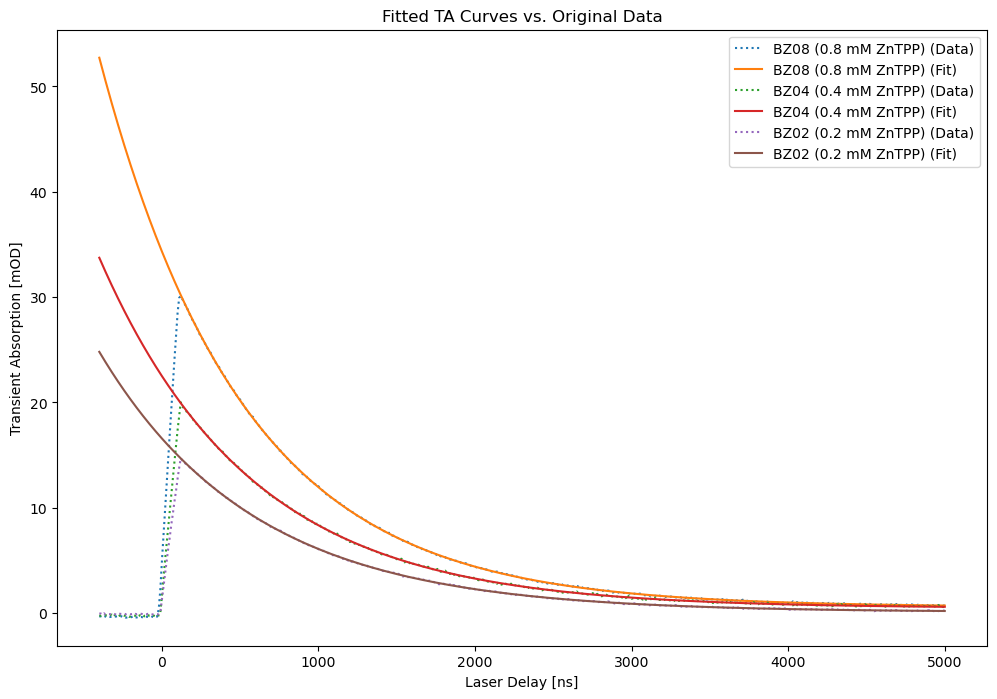

In [163]:
# @title Plot Fitted Curves with Original Data { display-mode: "form" }
import matplotlib.pyplot as plt

def plot_fitted_curves(experiment_list, yaxis='TAaverage'):
    """
    Plots the fitted curves along with the original averaged data for each file in the list.
    """
    plt.figure(figsize=(12, 8))

    for file in experiment_list:
        # Extract data to plot
        x = file['data']['Laser Delay [ns]']
        y = file['data'][yaxis]
        y_fit = file['data']['TA_fitted']

        # Plot original data
        plt.plot(x, y, label=f"{file['label']} (Data)", linestyle='dotted')

        # Plot fitted curve
        plt.plot(x, y_fit, label=f"{file['label']} (Fit)")

    # Plot styling
    plt.title('Fitted TA Curves vs. Original Data')
    plt.xlabel('Laser Delay [ns]')
    plt.ylabel('Transient Absorption [mOD]')
    plt.legend(loc='upper right')
    plt.show()

# Plot all fitted curves with original data
plot_fitted_curves(experiment1, yaxis='TAaverage')

* Is the single exponential fit adequate? Is a Y-axis offset needed as a free fit parameter?

Plotted results above. The single exponential fit appears adequate for describing the transient absorption decay. The Y-axis offset is necessary as its absence would result in skewed fit and inaccurate lifetime; furthermore, we have a non-zero baseline is accounted for by the offset parameter and prevents the fit from a forced zero baseline and distorted curve.

* Are there any trends in the maximum TA, delay of the peak, and lifetime? Briefly comment on possible explanations for trends or lack of them. 

Higher conc. of ZnTPP results in a greater population of excited molecules => higher absorbance signal; as for the delay of peak, there's a small deviation between the samples, however, this is insignificant as the excitement from the laser should be instantaneous. There's an elongation of decay with decreased conc. This could be related to intermolecular interactions and concomitant quenching/annihilation of the excited state. Cursory lit search points to triplet-triplet annihilation (TTA), where two excited molecules in their excited state interact to form ground state molecule.

## Task 4: Lifetime and Offset for Varying C70 Concentrations {-}

* Load and average the TA spectra for the different C70 concentrations. Explicitly report all the constants and/or known experimental values that you will need in your following analyses.

In [167]:
# Define all ZnTPP + C70 files (Varying C70 concentrations)
file4 = {'path': path, 'name': 'BZC1_JDG.csv', 'label': 'BZC1 (0.4 mM ZnTPP, 0.4 mM C70)', '[ZnTPP]': 0.4, '[C70]': 0.4, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}
file5 = {'path': path, 'name': 'BZC05_JGD.csv', 'label': 'BZC05 (0.4 mM ZnTPP, 0.2 mM C70)', '[ZnTPP]': 0.4, '[C70]': 0.2, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}
file6 = {'path': path, 'name': 'BZC01_JGD.csv', 'label': 'BZC01 (0.4 mM ZnTPP, 0.04 mM C70)', '[ZnTPP]': 0.4, '[C70]': 0.04, 'time_skip': 0, 'DA0_guess': 1., 'tau_guess': 10., 'offset_guess': 0.}

# Group the files into a list for processing
experiment2 = [file4, file5, file6]

# Load and average each file in the list
for file in experiment2:
    load_data_to_file_dict(file)
    calc_average_TA(file)

# Display confirmation message
print("Data loaded and averaged successfully for all ZnTPP + C70 concentrations.")

def print_experimental_values():
    print("----------------------------------------------------")
    print("Known Experimental Values for ZnTPP + C70 Experiments")
    print("----------------------------------------------------")
    print("\n1. ZnTPP Concentration (Constant):")
    print("   [ZnTPP] = 0.4 mM (Constant for all samples)")

    print("\n2. C70 Concentrations (Varied):")
    print("   Sample Labels and Their Corresponding C70 Concentrations:")
    print("   ---------------------------------------------")
    print("   | Sample Label | [ZnTPP] (mM) | [C70] (mM)   |")
    print("   |--------------|--------------|--------------|")
    print("   | BZC1         | 0.4           | 0.4          |")
    print("   | BZC05        | 0.4           | 0.2          |")
    print("   | BZC01        | 0.4           | 0.04         |")
    print("   ---------------------------------------------")

    print("\n3. Solvent:")
    print("   Benzonitrile (Used for all samples)")

    print("\n4. Experimental Setup:")
    print("   - Laser excitation used to generate the excited state (³ZnTPP*).")
    print("   - Transient Absorption measurement to monitor decay over time.")
    print("   - Signal collected over a wide range of laser delays.")

    print("\n5. Initial Guesses for Fitting:")
    print("   - time_skip = 0 (No data points excluded before fitting)")
    print("   - DA0_guess = 1.0 (Initial guess for amplitude)")
    print("   - tau_guess = 10.0 (Initial guess for lifetime)")
    print("   - offset_guess = 0.0 (Initial guess for baseline offset)")
    print("----------------------------------------------------\n")

# Call the function to print experimental values
print_experimental_values()

Data loaded and averaged successfully for all ZnTPP + C70 concentrations.
----------------------------------------------------
Known Experimental Values for ZnTPP + C70 Experiments
----------------------------------------------------

1. ZnTPP Concentration (Constant):
   [ZnTPP] = 0.4 mM (Constant for all samples)

2. C70 Concentrations (Varied):
   Sample Labels and Their Corresponding C70 Concentrations:
   ---------------------------------------------
   | Sample Label | [ZnTPP] (mM) | [C70] (mM)   |
   |--------------|--------------|--------------|
   | BZC1         | 0.4           | 0.4          |
   | BZC05        | 0.4           | 0.2          |
   | BZC01        | 0.4           | 0.04         |
   ---------------------------------------------

3. Solvent:
   Benzonitrile (Used for all samples)

4. Experimental Setup:
   - Laser excitation used to generate the excited state (³ZnTPP*).
   - Transient Absorption measurement to monitor decay over time.
   - Signal collected over a


* Plot the averaged TA spectra for the different C70 concentrations.

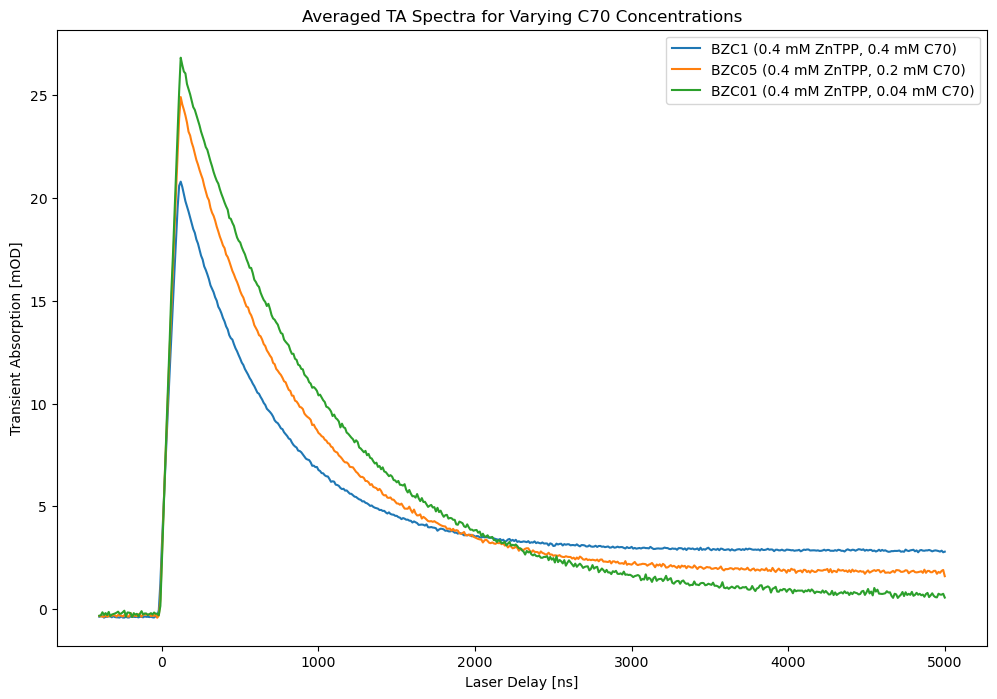

In [168]:
# @title Plot Averaged TA Spectra for C70 Experiments { display-mode: "form" }
def plot_C70_TA_spectra(experiment_list, yaxis='TAaverage'):
    """
    Plots the averaged TA spectra for varying C70 concentrations.

    Parameters:
    - experiment_list: List of file dictionaries containing C70 data.
    - yaxis: The column of the dataframe to use for plotting (default is 'TAaverage').
    """
    plt.figure(figsize=(12, 8))

    for file in experiment_list:
        if yaxis in file['data'].columns:
            plt.plot(file['data']['Laser Delay [ns]'], file['data'][yaxis], label=file['label'])
        else:
            print(f"ERROR: '{yaxis}' not found in {file['label']}. Make sure 'calc_average_TA()' was applied.")

    plt.title('Averaged TA Spectra for Varying C70 Concentrations')
    plt.xlabel('Laser Delay [ns]')
    plt.ylabel('Transient Absorption [mOD]')
    plt.legend(loc='upper right')
    plt.show()

# Plot the averaged spectra for the C70 experiments
plot_C70_TA_spectra(experiment2, yaxis='TAaverage')

* Fit each averaged TA spectra with an expontial curve plus Y-offset (similar to the task before). Report the maximum TA, lifetime, and offset for the different C70 
concentrations.
* Is the Y-offset important for these experiments? Give a brief explanation of its origin.

In [170]:
# @title Fit TA Data and Display Results for C70 Concentrations { display-mode: "form" }
def fit_and_report_C70_data(experiment_list, yaxis='TAaverage', verbose=True, semilog=False):
    """
    Fit each averaged TA spectrum for varying C70 concentrations and report the results.

    Parameters:
    - experiment_list: List of file dictionaries containing C70 data.
    - yaxis: The column of the dataframe to use for the fit (default is 'TAaverage').
    - verbose: If True, displays the fit plots.
    - semilog: If True, plots the fit in semilogy scale.
    """
    for file in experiment_list:
        # Calculate maximum TA and corresponding delay before fitting
        calc_max_TA(file)

        # Apply the fitting function
        fit_ta_data(file, yaxis=yaxis, verbose=verbose, semilog=semilog)

        # Print fitting results
        print(f"\n Fit for {file['label']}:")
        print(f"Maximum TA: {file['TAmax']:.2f} mOD at {file['LD_TAmax']:.2f} ns")
        print(f"Amplitude (DA0): {file['DA0']:.2f} ± {file['DA0_SE']:.2f}")
        print(f"Lifetime (tau): {file['tau']:.2f} ± {file['tau_SE']:.2f} ns")
        print(f"Offset: {file['offset']:.2f} ± {file['offset_SE']:.2f}")
        print("--------------------------------------------------")


# Fit and report the results for all C70 concentrations
fit_and_report_C70_data(experiment2, yaxis='TAaverage', verbose=False)


 Fit for BZC1 (0.4 mM ZnTPP, 0.4 mM C70):
Maximum TA: 20.80 mOD at 120.00 ns
Amplitude (DA0): 22.14 ± 0.01
Lifetime (tau): 578.81 ± 0.46 ns
Offset: 2.85 ± 0.00
--------------------------------------------------

 Fit for BZC05 (0.4 mM ZnTPP, 0.2 mM C70):
Maximum TA: 24.91 mOD at 120.00 ns
Amplitude (DA0): 27.34 ± 0.02
Lifetime (tau): 722.70 ± 0.66 ns
Offset: 1.78 ± 0.00
--------------------------------------------------

 Fit for BZC01 (0.4 mM ZnTPP, 0.04 mM C70):
Maximum TA: 26.83 mOD at 120.00 ns
Amplitude (DA0): 29.97 ± 0.02
Lifetime (tau): 899.97 ± 1.11 ns
Offset: 0.56 ± 0.01
--------------------------------------------------


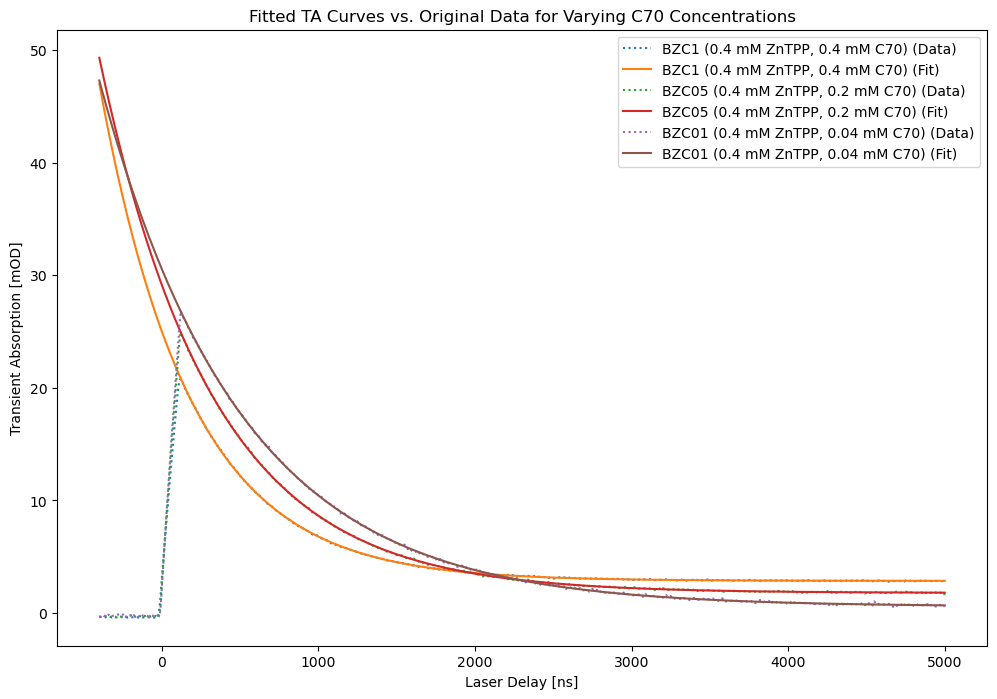

In [171]:
# @title Plot Fitted Curves with Original Data for C70 Experiments { display-mode: "form" }
def plot_fitted_C70_curves(experiment_list, yaxis='TAaverage'):
    """
    Plots the fitted curves along with the original averaged data for each file in the experiment list.

    Parameters:
    - experiment_list: List of file dictionaries containing C70 data.
    - yaxis: The column of the dataframe to use for plotting (default is 'TAaverage').
    """
    plt.figure(figsize=(12, 8))

    for file in experiment_list:
        x = file['data']['Laser Delay [ns]']
        y = file['data'][yaxis]

        # Plot original averaged data (dotted line)
        plt.plot(x, y, label=f"{file['label']} (Data)", linestyle='dotted')

        # Check if the 'TA_fitted' column exists
        if 'TA_fitted' in file['data'].columns:
            y_fit = file['data']['TA_fitted']
            plt.plot(x, y_fit, label=f"{file['label']} (Fit)")
        else:
            print(f"ERROR: No fitted data found for {file['label']}. Make sure fitting was performed successfully.")

    # Plot formatting
    plt.title('Fitted TA Curves vs. Original Data for Varying C70 Concentrations')
    plt.xlabel('Laser Delay [ns]')
    plt.ylabel('Transient Absorption [mOD]')
    plt.legend(loc='upper right')
    plt.show()

# Plot all fitted curves with original data
plot_fitted_C70_curves(experiment2)

Y-offset history reveals a relatively recent phenomenon. Cursory search states that the technique of pump-probe and flash photolysis were developed around the mid 20th century; the actual observation of the absorbance signal failing to return to zero was made is the 60s and resulted in a Nobel Prize in 1967. Initially the baseline offset was dismissed as instrumental noise or incomplete signal recovery. The Y-offset is now recognized as an integral element to transient absorption. The failure to return to zero is attributed to instrumental noise, scattering, and decay aberrations. Y-offset is necessary to prevent the fit from attempting to force the curve to zero and therefore affecting the tau estimate. Apart from instrumental artifacts and light scattering, recent understanding emphasizes solvent effects (which might slow decay) and TTA where the annihilation alters the decay rate. Today, Y-offset is routinely included as it's necessary for an accurate fit adn lifetime estimation.

* Perform a linear fit of the inverse lifetimes (a.k.a. the effective reaction constants) as a function of the concentration of C70. 
* From the slope of the linear fit, compute the reaction constant $k_q$ and report it using the correct units.

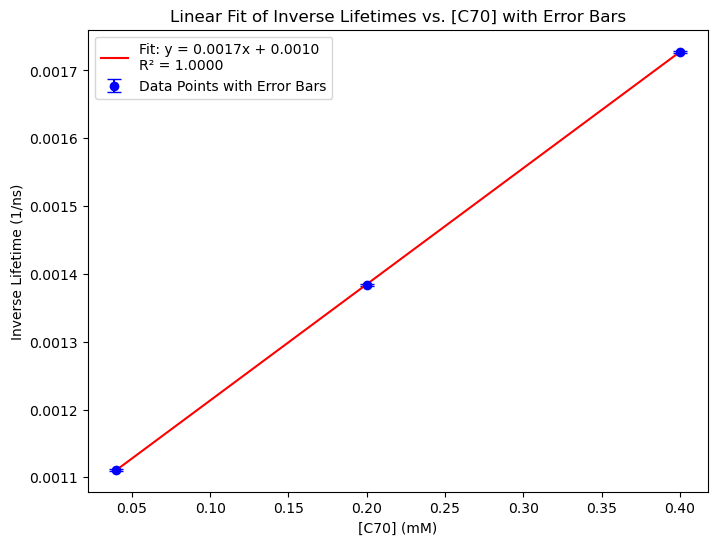

--------------------------------------------------
Linear Fit Results (Inverse Lifetimes vs. [C70]):
Slope (Reaction Constant): 0.0017 (1/(mM·ns))
Intercept: 0.0010 (1/ns)
R² (Goodness of Fit): 1.0000
--------------------------------------------------


In [174]:

# @title Linear Fit of Inverse Lifetimes vs. [C70] with Error Bars { display-mode: "form" }
def fit_inverse_lifetimes_with_errorbars(experiment_list):
    """
    Perform a linear fit of inverse lifetimes vs. C70 concentration and plot the result with error bars.

    Parameters:
    - experiment_list: List of file dictionaries containing C70 data.

    Returns:
    - slope (reaction constant)
    - intercept (y-intercept of the linear fit)
    - r_squared (goodness of fit)
    """
    # Extract C70 concentrations, inverse lifetimes, and errors (tau_SE)
    C70_conc = np.array([file['[C70]'] for file in experiment_list])
    lifetimes = np.array([file['tau'] for file in experiment_list])
    inverse_lifetimes = 1 / lifetimes
    inverse_lifetime_errors = np.array([file['tau_SE'] / (file['tau'] ** 2) for file in experiment_list])  # Propagation of uncertainty

    # Reshape data for linear regression
    C70_conc_reshaped = C70_conc.reshape(-1, 1)

    # Perform the linear fit
    model = LinearRegression()
    model.fit(C70_conc_reshaped, inverse_lifetimes)

    # Extract fitting parameters
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(C70_conc_reshaped, inverse_lifetimes)

    # Plotting the linear fit with error bars
    plt.figure(figsize=(8, 6))
    plt.errorbar(C70_conc, inverse_lifetimes, yerr=inverse_lifetime_errors, fmt='o', label='Data Points with Error Bars', color='blue', capsize=5)
    plt.plot(C70_conc, model.predict(C70_conc_reshaped), label=f'Fit: y = {slope:.4f}x + {intercept:.4f}\nR² = {r_squared:.4f}', color='red')
    plt.title('Linear Fit of Inverse Lifetimes vs. [C70] with Error Bars')
    plt.xlabel('[C70] (mM)')
    plt.ylabel('Inverse Lifetime (1/ns)')
    plt.legend(loc='upper left')
    plt.show()

    # Print results with errors
    print("--------------------------------------------------")
    print("Linear Fit Results (Inverse Lifetimes vs. [C70]):")
    print(f"Slope (Reaction Constant): {slope:.4f} (1/(mM·ns))")
    print(f"Intercept: {intercept:.4f} (1/ns)")
    print(f"R² : {r_squared:.4f}")
    print("--------------------------------------------------")

    return slope, intercept, r_squared

# Perform the linear fit with error bars
reaction_constant_kq, intercept, r_squared = fit_inverse_lifetimes_with_errorbars(experiment2)

In [173]:
# @title Compute and Display the Reaction Constant { display-mode: "form" }
def compute_reaction_constant(slope):
    """
    Computes the reaction constant k_q from the slope of the linear fit.

    Parameters:
    - slope: Slope of the linear fit (units: 1/(mM·ns))

    Returns:
    - k_q: Reaction constant (units: L/(mM·ns))
    """

    k_q = slope

    # Print the result with units
    print("--------------------------------------------------")
    print(f"Reaction Constant (k_q): {k_q:.4f} L/(mM·ns)")
    print("--------------------------------------------------")

    return k_q

# Compute and display the reaction constant
reaction_constant_kq = compute_reaction_constant(reaction_constant)

--------------------------------------------------
Reaction Constant (k_q): 0.0017 L/(mM·ns)
--------------------------------------------------


In [164]:
# This cell is used to allow Google Colab to install the tools to convert the notebook to a pdf file
# Un-comment the following lines when you are ready to export the pdf 
#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
#!pip install pypandoc

In [165]:
# Use this command to convert the finished worksheet into a pdf 
# NOTE : you may want to change the path of the file, if you are working in a different folder of the Google Drive
#!jupyter nbconvert --no-input --to PDF "/content/drive/MyDrive/Colab Notebooks/TA_Worksheet.ipynb"